In [57]:
import numpy as np
import pandas as pd

from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
df=pd.read_csv("Donnees_propres.csv")
display(df.head())
display(df.info())

,lib_mrq,lib_mod_doss,lib_mod,dscom,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,typ_boite,nb_rapp,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.3,5.8,7.8,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.5,6.0,8.0,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),non,9,125.0,6.9,4.3,5.3,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52308 non-null  object 
 1   lib_mod_doss     52308 non-null  object 
 2   lib_mod          52308 non-null  object 
 3   dscom            52308 non-null  object 
 4   hybride          52308 non-null  object 
 5   puiss_admin_98   52308 non-null  int64  
 6   puiss_max        52308 non-null  float64
 7   conso_urb        52308 non-null  float64
 8   conso_exurb      52308 non-null  float64
 9   conso_mixte      52308 non-null  float64
 10  co2              52308 non-null  float64
 11  co_typ_1         52308 non-null  float64
 12  nox              52308 non-null  float64
 13  ptcl             52308 non-null  float64
 14  masse_ordma_min  52308 non-null  int64  
 15  masse_ordma_max  52308 non-null  int64  
 16  champ_v9         52308 non-null  object 
 17  Carrosserie 

None

On supprime les colonnes qui contiennent des informations sur la marque ou le constructeur :
lib_mrq, lib_mod_doss, lib_mod_ dscom ainsi que la variable champ_v9, co2 (nous avons les etiquettes), puiss_admin_98, co_typ_1 


In [59]:
to_drop = ['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'champ_v9', 'co2', 'puiss_admin_98', 'co_typ_1',
           'conso_urb', 'conso_exurb', 'conso_mixte']
df_clear = df.drop(to_drop, axis = 1)

In [60]:

# On récupère les colonnes de type Object
colonnes_object = df_clear.select_dtypes(include='object')

# On calcule le nombre de modalités de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)

# 6 Variables catégorielles à réencoder

hybride         2
Carrosserie    11
gamme           6
carburant       4
typ_boite       3
etiquette       7
dtype: int64


Reencodage des variables categorielles

In [61]:
# Variable hybride

# On remplace les notes alphabétiques par les notes numériques correspondantes
df_clear['hybride'] = df_clear['hybride'].replace({'oui':1, 'non': 0})
display('hybride', df_clear['hybride'].unique())

# Variable cible etiquette
# On créé un dictionnaire qui contient les changements souhaités
grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# On remplace les notes alphabétiques par les notes numériques correspondantes
df_clear['etiquette'] = df_clear['etiquette'].replace(grade)
display('etiquette', df_clear['etiquette'].unique())

'hybride'

array([0, 1])

'etiquette'

array([4, 2, 3, 1, 0, 5, 6])

In [62]:
df_encoded = pd.get_dummies(df_clear, dtype='int')

In [63]:
df_encoded.info()
df_encoded.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hybride                          52308 non-null  int64  
 1   puiss_max                        52308 non-null  float64
 2   nox                              52308 non-null  float64
 3   ptcl                             52308 non-null  float64
 4   masse_ordma_min                  52308 non-null  int64  
 5   masse_ordma_max                  52308 non-null  int64  
 6   nb_rapp                          52308 non-null  int64  
 7   etiquette                        52308 non-null  int64  
 8   Carrosserie_BERLINE              52308 non-null  int64  
 9   Carrosserie_BREAK                52308 non-null  int64  
 10  Carrosserie_CABRIOLET            52308 non-null  int64  
 11  Carrosserie_COMBISPACE           52308 non-null  int64  
 12  Carrosserie_COMBIS

Index(['hybride', 'puiss_max', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'nb_rapp', 'etiquette', 'Carrosserie_BERLINE',
       'Carrosserie_BREAK', 'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE',
       'Carrosserie_COMBISPCACE', 'Carrosserie_COUPE', 'Carrosserie_MINIBUS',
       'Carrosserie_MINISPACE', 'Carrosserie_MONOSPACE',
       'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_TS TERRAINS/CHEMINS',
       'gamme_ECONOMIQUE', 'gamme_INFERIEURE', 'gamme_LUXE', 'gamme_MOY-INFER',
       'gamme_MOY-SUPER', 'gamme_SUPERIEURE', 'carburant_Essence',
       'carburant_Essence/Elec', 'carburant_Gasoil/Elec', 'carburant_Gazoil',
       'typ_boite_Auto', 'typ_boite_Manuelle', 'typ_boite_Var_continue'],
      dtype='object')

Separation des données

In [64]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns ='etiquette', axis = 1)
y= df_encoded['etiquette']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



Standardisation des données

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Premiers modèles

Random Forest

score données train 0.8939922573244754
score données test 0.8729688396100173
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.83      0.88      0.86       249
           2       0.87      0.80      0.83       427
           3       0.79      0.77      0.78       324
           4       0.80      0.87      0.83      3333
           5       0.92      0.88      0.90      5968
           6       1.00      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.87      0.85      0.86     10462
weighted avg       0.88      0.87      0.87     10462



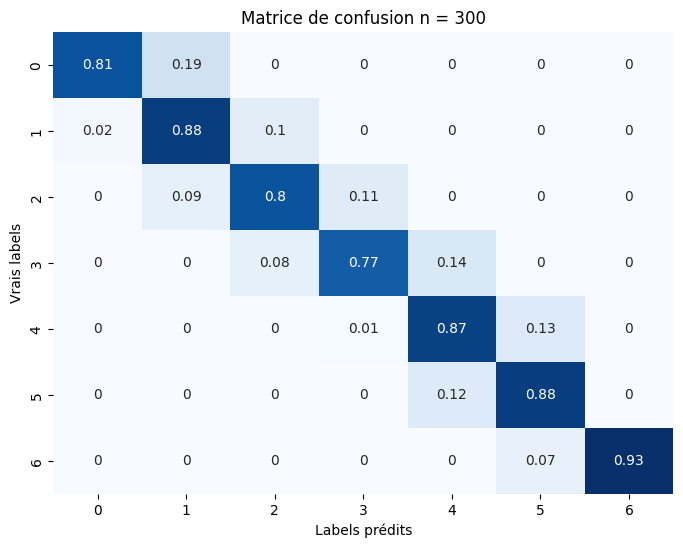

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n = 300")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Certaines classes sont sous représentées

In [67]:
importances = model.feature_importances_

features = X.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

                            Feature  Importance
2                               nox    0.243543
5                   masse_ordma_max    0.146017
4                   masse_ordma_min    0.116566
6                           nb_rapp    0.084116
1                         puiss_max    0.078076
29               typ_boite_Manuelle    0.070816
28                   typ_boite_Auto    0.068786
13              Carrosserie_MINIBUS    0.037828
3                              ptcl    0.037507
21                  gamme_MOY-INFER    0.020982
22                  gamme_MOY-SUPER    0.019607
7               Carrosserie_BERLINE    0.017423
27                 carburant_Gazoil    0.010351
24                carburant_Essence    0.009667
20                       gamme_LUXE    0.009000
23                 gamme_SUPERIEURE    0.006512
17  Carrosserie_TS TERRAINS/CHEMINS    0.005283
8                 Carrosserie_BREAK    0.003996
19                 gamme_INFERIEURE    0.002635
9             Carrosserie_CABRIOLET    0

On testera plus le meme modele avec les 5 variables qui ont le plus d'importance

Random forest avec l'argument class_weight='balanced'

score données train 0.8847440615590498
score données test 0.8698145670043969
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        31
           1       0.82      0.87      0.84       249
           2       0.87      0.79      0.83       427
           3       0.70      0.87      0.78       324
           4       0.78      0.91      0.84      3333
           5       0.96      0.85      0.90      5968
           6       0.75      0.99      0.85       130

    accuracy                           0.87     10462
   macro avg       0.80      0.87      0.83     10462
weighted avg       0.88      0.87      0.87     10462



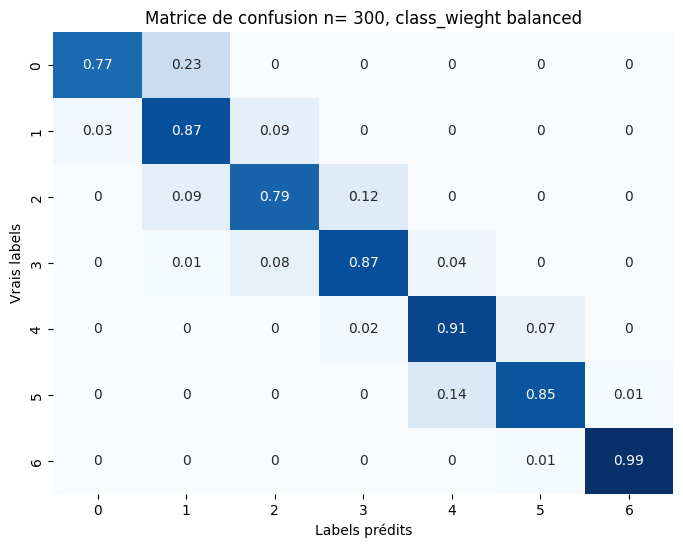

In [68]:
# Modele avec l'argument class_weight='balanced'
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n= 300, class_wieght balanced")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Random forest avec plus de branches : 500

score données train 0.8286335611527984
score données test 0.8073026190021029
              precision    recall  f1-score   support

           0       0.66      0.61      0.63        31
           1       0.75      0.79      0.77       249
           2       0.80      0.74      0.77       427
           3       0.71      0.73      0.72       324
           4       0.79      0.64      0.70      3333
           5       0.82      0.91      0.86      5968
           6       0.99      0.92      0.96       130

    accuracy                           0.81     10462
   macro avg       0.79      0.76      0.77     10462
weighted avg       0.81      0.81      0.80     10462



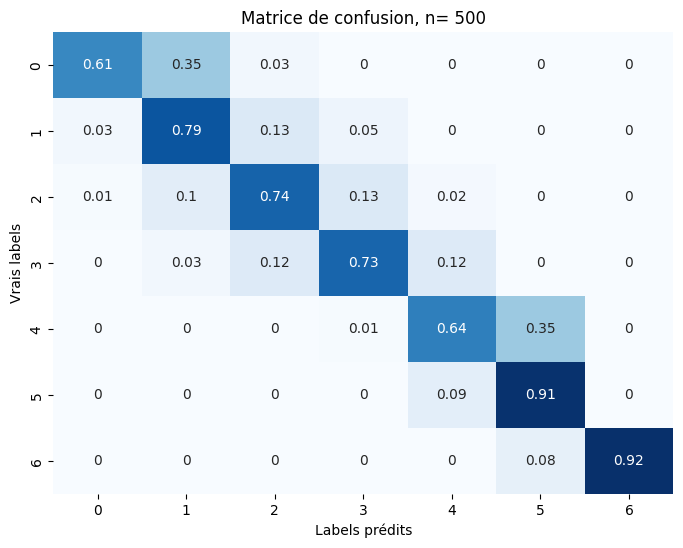

In [85]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n= 500")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Reechantillonage SMOTE

score données train 0.9500586013803881
score données test 0.869145478875932
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        31
           1       0.79      0.86      0.83       249
           2       0.87      0.76      0.81       427
           3       0.71      0.85      0.78       324
           4       0.78      0.91      0.84      3333
           5       0.95      0.85      0.90      5968
           6       0.78      0.96      0.86       130

    accuracy                           0.87     10462
   macro avg       0.80      0.85      0.82     10462
weighted avg       0.88      0.87      0.87     10462



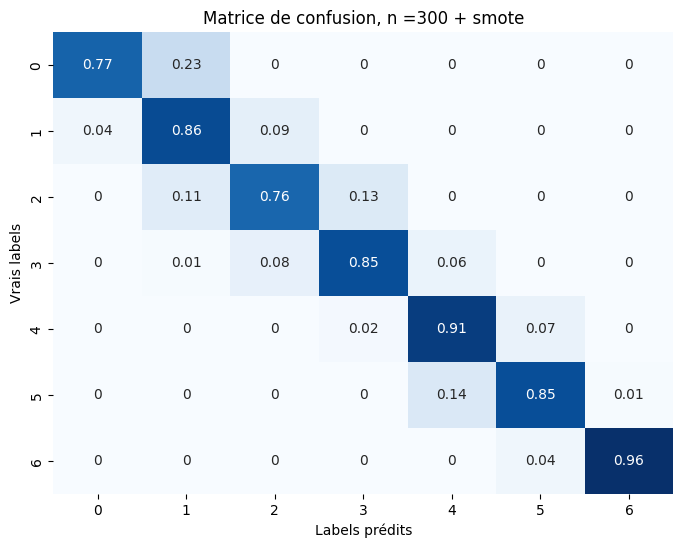

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n =300 + smote")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Reechantillonage undersampling

score données train 0.9655419956927495
score données test 0.8129420760848786
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        31
           1       0.69      0.74      0.72       249
           2       0.81      0.65      0.72       427
           3       0.52      0.87      0.65       324
           4       0.76      0.79      0.78      3333
           5       0.91      0.83      0.87      5968
           6       0.42      0.99      0.59       130

    accuracy                           0.81     10462
   macro avg       0.65      0.84      0.71     10462
weighted avg       0.83      0.81      0.82     10462



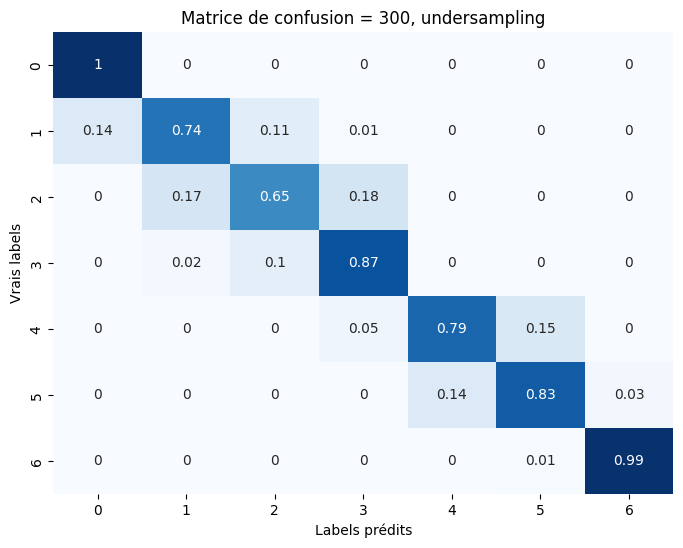

In [71]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_resampled, y_train_resampled))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion = 300, undersampling")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Moins précis que le modele avec les données non rééchantillonées

Modele XGBoost

score données train 0.9408422024648095
score données test 0.86771171860065
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        31
           1       0.78      0.87      0.83       249
           2       0.88      0.75      0.81       427
           3       0.69      0.88      0.78       324
           4       0.78      0.91      0.84      3333
           5       0.95      0.85      0.90      5968
           6       0.68      0.99      0.81       130

    accuracy                           0.87     10462
   macro avg       0.77      0.85      0.80     10462
weighted avg       0.88      0.87      0.87     10462



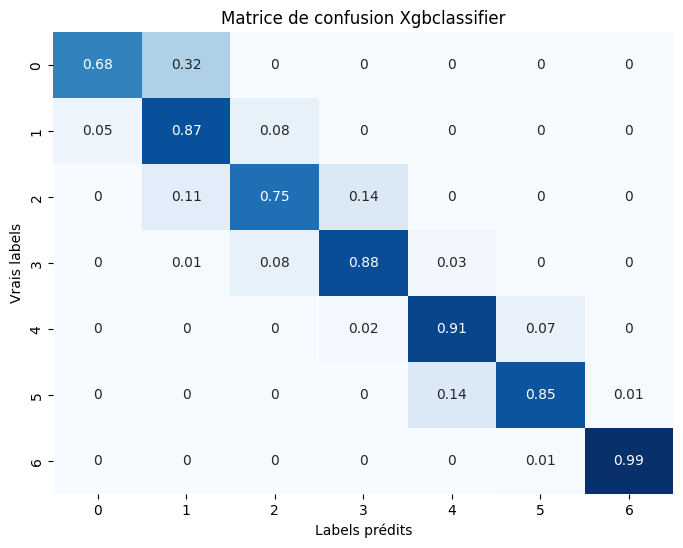

In [72]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric="merror", use_label_encoder=False)

model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion Xgbclassifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Selecion de variables

On teste le premier modèle avec les variables qui ont le plus d'importance

In [73]:
df=pd.read_csv("Donnees_propres.csv")

X = df[['nox', 'masse_ordma_min', 'masse_ordma_max', 'nb_rapp', 'puiss_max']]

In [74]:
# Variable cible etiquette
# On créé un dictionnaire qui contient les changements souhaités
grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# On remplace les notes alphabétiques par les notes numériques correspondantes
y= df['etiquette']
y = y.replace(grade)
display('etiquette', y.unique())

'etiquette'

array([4, 2, 3, 1, 0, 5, 6])

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8925106342302729
score données test 0.8678073026190021
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.79      0.87      0.83       249
           2       0.82      0.78      0.80       427
           3       0.76      0.71      0.73       324
           4       0.79      0.87      0.83      3333
           5       0.93      0.88      0.90      5968
           6       0.99      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.83      0.81      0.82     10462
weighted avg       0.87      0.87      0.87     10462



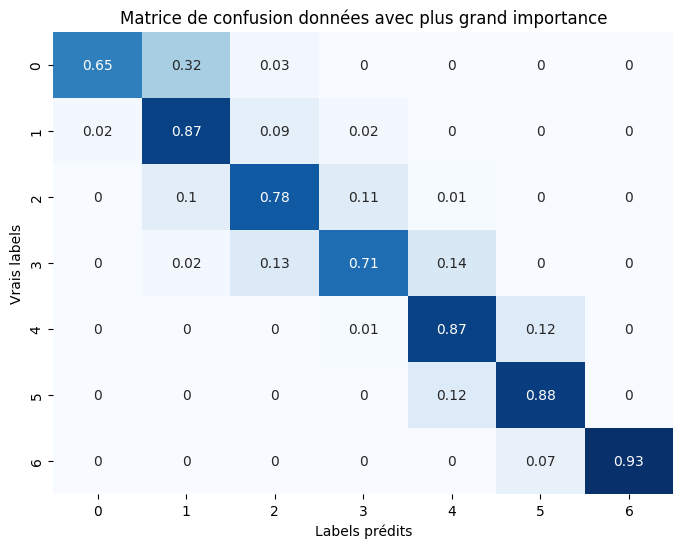

In [76]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données avec plus grand importance")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Selection des données purement caracteristiques de la voiture

In [77]:
df=pd.read_csv("Donnees_propres.csv")
df_caract = df[['carburant','hybride','masse_ordma_min','masse_ordma_max',
                "puiss_max",'Carrosserie','typ_boite','nb_rapp', 'gamme']]


In [78]:
# On remplace les notes alphabétiques par les notes numériques correspondantes
df_caract['hybride'] = df_caract['hybride'].replace({'oui':1, 'non': 0})

df_encoded = pd.get_dummies(df_caract, dtype='int')

In [79]:

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8337475505424652
score données test 0.8124641559931179
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.77      0.85      0.81       249
           2       0.84      0.76      0.80       427
           3       0.76      0.74      0.75       324
           4       0.77      0.67      0.72      3333
           5       0.83      0.90      0.86      5968
           6       1.00      0.92      0.96       130

    accuracy                           0.81     10462
   macro avg       0.80      0.77      0.79     10462
weighted avg       0.81      0.81      0.81     10462



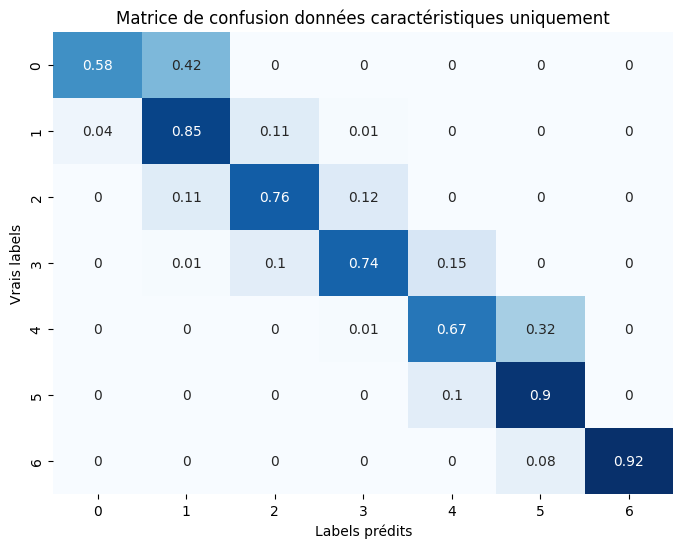

In [80]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques uniquement")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [81]:
importances = model.feature_importances_

features = X_train.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

                            Feature  Importance
2                   masse_ordma_max    0.218037
1                   masse_ordma_min    0.158021
3                         puiss_max    0.129075
20                   typ_boite_Auto    0.105197
4                           nb_rapp    0.086837
21               typ_boite_Manuelle    0.078048
15              Carrosserie_MINIBUS    0.054772
26                  gamme_MOY-INFER    0.029993
9               Carrosserie_BERLINE    0.029150
27                  gamme_MOY-SUPER    0.026776
8                  carburant_Gazoil    0.016530
5                 carburant_Essence    0.015408
25                       gamme_LUXE    0.012297
28                 gamme_SUPERIEURE    0.007577
19  Carrosserie_TS TERRAINS/CHEMINS    0.007513
10                Carrosserie_BREAK    0.005795
24                 gamme_INFERIEURE    0.003297
11            Carrosserie_CABRIOLET    0.002681
14                Carrosserie_COUPE    0.002508
0                           hybride    0

Avec les 5 caractéristiques les plus importantes

In [82]:
df_caract = df[['masse_ordma_min','masse_ordma_max',"puiss_max",'typ_boite','nb_rapp']]

df_encoded = pd.get_dummies(df_caract, dtype='int')

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8286335611527984
score données test 0.8072070349837507
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        31
           1       0.75      0.79      0.77       249
           2       0.81      0.74      0.77       427
           3       0.70      0.73      0.71       324
           4       0.79      0.64      0.70      3333
           5       0.82      0.91      0.86      5968
           6       0.99      0.92      0.96       130

    accuracy                           0.81     10462
   macro avg       0.78      0.76      0.77     10462
weighted avg       0.81      0.81      0.80     10462



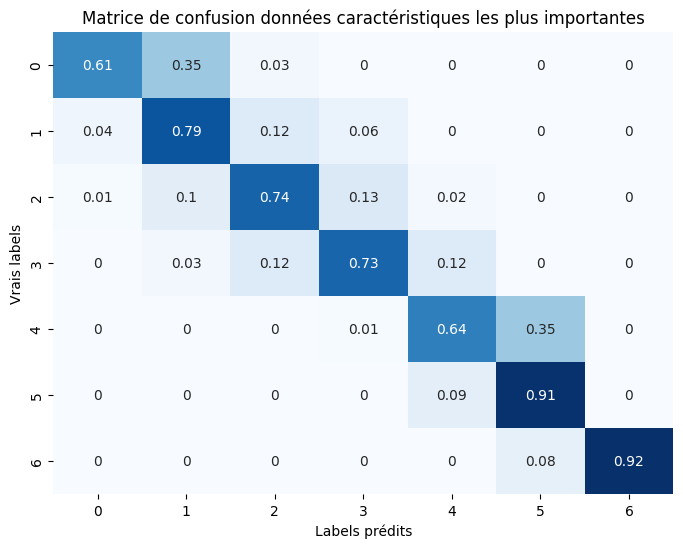

In [83]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques les plus importantes")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()